# Imports

In [1]:
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter
from math import radians

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
wain = pd.read_csv('../data/adam-wainwright.csv')
wain.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(wain.shape)
wain.head()

(3068, 89)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,swing_miss
0,FC,2021-09-28,86.4,-1.10,6.25,"Wainwright, Adam",500871,425794,out,hit_into_play,12,Eduardo Escobar grounds out to first baseman P...,R,L,R,STL,MIL,X,3.0,ground_ball,0,1,2021,0.49,7.44,0.88,2.43,NaN,649966.0,607054.0,2,6,Top,155.84,165.13,668800,3.730995,-125.873064,-4.270794,4.660825,21.797698,-24.938079,3.30,1.50,20.0,60.1,-4.0,87.4,2422.0,6.5,632314,425794,668800,502671,669242,571448,657557,641933,664056,666185,53.97,0.1,0.092,0.0,1.0,0.0,0.0,2.0,51,2,Cutter,4,2,2,4,2,4,2,4,Strategic,Strategic,183.0,0.058,-0.366,1,0-1,-0.88,-5.88,0
1,FC,2021-09-28,85.9,-1.09,6.36,"Wainwright, Adam",500871,425794,NaN,called_strike,2,Eduardo Escobar grounds out to first baseman P...,R,L,R,STL,MIL,S,NaN,NaN,0,0,2021,0.42,3.96,0.20,2.86,NaN,649966.0,607054.0,2,6,Top,NaN,NaN,668800,2.210030,-125.192475,-2.755686,4.050163,23.188532,-28.415463,3.02,1.43,NaN,NaN,NaN,86.6,2382.0,6.5,632314,425794,668800,502671,669242,571448,657557,641933,664056,666185,54.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,1,Cutter,4,2,2,4,2,4,2,4,Strategic,Standard,166.0,0.000,-0.075,1,0-0,-0.20,-5.04,0
2,SI,2021-09-28,89.9,-1.08,6.23,"Wainwright, Adam",621438,425794,strikeout,swinging_strike,3,Tyrone Taylor strikes out swinging.,R,R,R,STL,MIL,S,2.0,NaN,2,2,2021,-0.65,14.52,0.68,2.99,NaN,649966.0,607054.0,1,6,Top,NaN,NaN,668800,5.784091,-130.855154,-4.669285,-8.647461,27.030423,-17.496824,3.30,1.61,NaN,NaN,NaN,90.9,2192.0,6.8,632314,425794,668800,502671,669242,571448,657557,641933,664056,666185,53.66,NaN,NaN,0.0,1.0,0.0,0.0,NaN,50,5,Sinker,4,2,2,4,2,4,2,4,Standard,Standard,199.0,0.064,-0.433,1,2-2,-0.68,7.80,1
3,FC,2021-09-28,85.9,-1.05,6.25,"Wainwright, Adam",621438,425794,NaN,foul,3,Tyrone Taylor strikes out swinging.,R,R,R,STL,MIL,S,NaN,NaN,2,1,2021,0.65,5.76,0.65,3.26,NaN,649966.0,607054.0,1,6,Top,NaN,NaN,668800,2.719844,-125.179497,-1.890460,6.428149,21.811586,-26.928095,3.30,1.61,152.0,71.3,25.0,86.8,2403.0,6.5,632314,425794,668800,502671,669242,571448,657557,641933,664056,666185,54.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,4,Cutter,4,2,2,4,2,4,2,4,Standard,Standard,142.0,0.000,-0.138,1,2-1,-0.65,-7.80,0
4,SI,2021-09-28,90.9,-1.09,6.18,"Wainwright, Adam",621438,425794,NaN,called_strike,9,Tyrone Taylor strikes out swinging.,R,R,R,STL,MIL,S,NaN,NaN,2,0,2021,-1.10,8.16,0.54,1.78,NaN,649966.0,607054.0,1,6,Top,NaN,NaN,668800,6.501698,-132.240721,-6.659546,-14.292993,25.861898,-22.961406,3.21,1.62,NaN,NaN,NaN,92.0,2271.0,6.8,632314,425794,668800,502671,669242,571448,657557,641933,664056,666185,53.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,3,Sinker,4,2,2,4,2,4,2,4,Standard,Standard,205.0,0.000,-0.149,1,2-0,-0.54,13.20,0


In [3]:
spin_axis = wain.groupby(['pitch_type']).mean()
spin_axis

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,82.740816,-1.333520,6.221888,593031.714286,425794.0,9.025510,5.638298,0.683673,0.576531,2021.0,-1.153418,7.725918,-0.464745,2.028827,617529.285714,584907.733333,586903.256410,0.923469,3.795918,127.726739,125.529783,443228.642857,4.252372,-120.425561,-4.381126,-12.050485,22.222483,-25.264899,3.383265,1.569490,137.569231,82.563077,9.415385,82.810714,1714.687179,6.495897,633350.775510,425794.0,443228.642857,506962.224490,659800.209184,571448.0,641277.852041,641511.479592,664499.397959,660265.132653,54.001429,0.251196,0.264500,0.274468,1.000000,0.255319,0.127660,2.956522,27.275510,2.295918,1.000000,1.780612,0.948980,1.831633,1.780612,1.000000,0.948980,1.831633,222.579487,0.000684,-0.007224,0.612245,0.464745,13.841020,0.071429
CS,65.423077,-1.343846,6.389231,578846.384615,425794.0,10.076923,7.000000,0.000000,0.384615,2021.0,1.233846,-15.064615,-0.383846,2.133846,NaN,456501.000000,664774.000000,0.769231,4.000000,82.550000,115.150000,444563.384615,-0.149149,-95.070420,2.627888,7.397234,17.501637,-40.406583,3.449231,1.583846,128.500000,81.350000,8.000000,64.676923,2539.384615,6.200000,633072.000000,425794.0,444563.384615,502671.000000,651527.846154,571448.0,642365.000000,645664.076923,664383.538462,666705.923077,54.313077,0.646000,0.592000,0.900000,1.000000,1.000000,0.000000,4.000000,29.000000,1.384615,1.230769,1.846154,0.615385,2.461538,1.846154,1.230769,0.615385,2.461538,39.076923,0.003769,0.036308,0.461538,0.383846,-14.806154,0.153846
CU,73.476015,-1.175077,6.368810,599170.390716,425794.0,9.562863,5.056604,0.883946,0.964217,2021.0,1.382031,-14.734584,0.164294,1.908433,599943.285714,578319.408537,589060.970149,0.957447,3.946809,123.905099,123.981881,437623.760155,0.323359,-106.868709,0.550369,10.359553,22.054400,-41.804195,3.393114,1.570174,125.254545,80.646809,3.936170,72.440619,2839.100292,6.358423,633461.040619,425794.0,437623.760155,507619.326886,657640.521277,571448.0,643439.406190,642218.104449,664571.666344,660126.639265,54.139836,0.322515,0.346733,0.258824,1.000000,0.169550,0.117647,3.084158,28.409091,2.957447,1.025145,1.656673,0.853965,1.827853,1.673114,1.035783,0.881044,1.827853,44.294060,0.000545,-0.010925,0.690522,-0.164294,-16.584371,0.123791
FC,84.940356,-1.184629,6.304955,598109.123145,425794.0,9.468843,5.053892,0.862018,0.781899,2021.0,0.529585,6.488546,0.620178,2.334362,602700.323529,572243.423729,597335.832536,0.955490,3.626113,133.222973,128.271892,444979.253709,3.184391,-123.731058,-4.141824,4.890567,22.428979,-25.980302,3.408472,1.577537,144.083333,79.686131,14.959854,85.424332,2408.166667,6.501488,633484.170623,425794.0,444979.253709,507142.617211,656726.155786,571448.0,644807.658754,642004.887240,664595.169139,660457.158754,53.998249,0.341660,0.371503,0.330585,0.989362,0.191489,0.180851,3.136054,26.238872,2.744807,1.077151,1.603858,0.905045,1.775964,1.617211,1.099407,0.940653,1.775964,158.971726,0.000540,-0.005280,0.698813,-0.620178,-6.355015,0.102374
FF,89.027931,-1.166966,6.273517,590778.300000,425794.0,8.865517,4.787879,1.068966,1.189655,2021.0,-0.161483,14.593655,-0.247862,2.719966,600353.538462,569179.656250,601898.987342,0.979310,3.700000,123.629574,113.036170,440117.313

In [4]:
r_wain = wain.loc[wain['stand'] == 'R']
l_wain = wain.loc[wain['stand'] == 'L']

cu = wain.loc[wain['pitch_type'] == 'CU']
si = wain.loc[wain['pitch_type'] == 'SI']
fc = wain.loc[wain['pitch_type'] == 'FC']
ff = wain.loc[wain['pitch_type'] == 'FF']
ch = wain.loc[wain['pitch_type'] == 'CH']
cs = wain.loc[wain['pitch_type'] == 'CS']

r_cu = wain.loc[(wain['pitch_type'] == 'CU') & (wain['stand'] == 'R')]
r_si = wain.loc[(wain['pitch_type'] == 'SI') & (wain['stand'] == 'R')]
r_fc = wain.loc[(wain['pitch_type'] == 'FC') & (wain['stand'] == 'R')]
r_ff = wain.loc[(wain['pitch_type'] == 'FF') & (wain['stand'] == 'R')]
r_ch = wain.loc[(wain['pitch_type'] == 'CH') & (wain['stand'] == 'R')]
r_cs = wain.loc[(wain['pitch_type'] == 'CS') & (wain['stand'] == 'R')]

l_cu = wain.loc[(wain['pitch_type'] == 'CU') & (wain['stand'] == 'L')]
l_si = wain.loc[(wain['pitch_type'] == 'SI') & (wain['stand'] == 'L')]
l_fc = wain.loc[(wain['pitch_type'] == 'FC') & (wain['stand'] == 'L')]
l_ff = wain.loc[(wain['pitch_type'] == 'FF') & (wain['stand'] == 'L')]
l_ch = wain.loc[(wain['pitch_type'] == 'CH') & (wain['stand'] == 'L')]
l_cs = wain.loc[(wain['pitch_type'] == 'CS') & (wain['stand'] == 'L')]

# Pitcher Overview

### Pitch Distribution

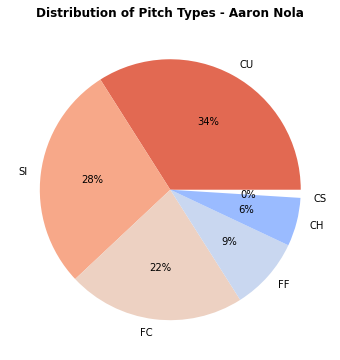

In [5]:
plt.figure(figsize = (8, 6))

dist = round(wain.pitch_type.value_counts(normalize = True), 2)
labels = ['CU', 'SI', 'FC', 'FF', 'CH', 'CS']
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = labels, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Aaron Nola', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

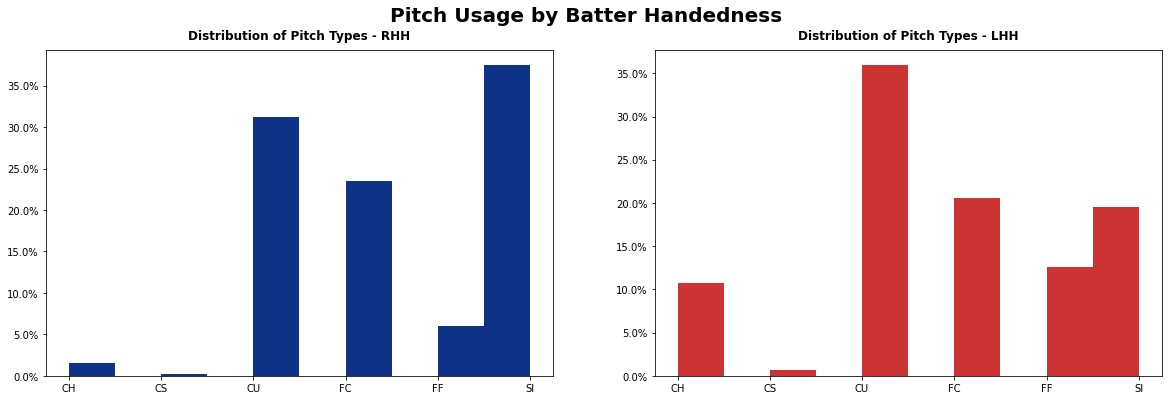

In [6]:
blue = '#0E3386'
red = '#CC3433'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 20, fontweight = 'bold')

dist_r = r_wain.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)

dist_l = l_wain.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

CU velo sits: 73 - 74 mph,  max: 77.1 mph
SI velo sits: 88 - 90 mph,  max: 92.4 mph
FC velo sits: 84 - 86 mph,  max: 89.8 mph
FF velo sits: 88 - 90 mph,  max: 92.4 mph
CH velo sits: 82 - 84 mph,  max: 85.7 mph
CS velo sits: 64 - 66 mph,  max: 69.0 mph


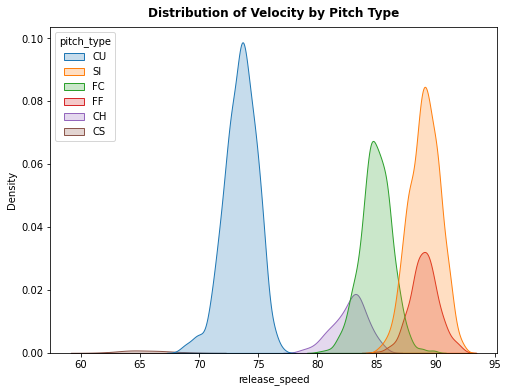

In [7]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = wain, x = 'release_speed', shade = 'fill', 
            multiple = 'layer', hue = 'pitch_type', 
            hue_order = ['CU', 'SI', 'FC', 'FF', 'CH', 'CS'], 
            palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Distribution of Velocity by Pitch Type', fontdict = font_title, pad = 15);
print('CU velo sits:', round(cu['release_speed'].quantile(.25)), '-', round(cu['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(cu['release_speed'].max(), 2), 'mph')
print('SI velo sits:', round(si['release_speed'].quantile(.25)), '-', round(si['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(si['release_speed'].max(), 2), 'mph')
print('FC velo sits:', round(fc['release_speed'].quantile(.25)), '-', round(fc['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(fc['release_speed'].max(), 2), 'mph')
print('FF velo sits:', round(si['release_speed'].quantile(.25)), '-', round(si['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(si['release_speed'].max(), 2), 'mph')
print('CH velo sits:', round(ch['release_speed'].quantile(.25)), '-', round(ch['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ch['release_speed'].max(), 2), 'mph')
print('CS velo sits:', round(cs['release_speed'].quantile(.25)), '-', round(cs['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(cs['release_speed'].max(), 2), 'mph');

# Pitcher Stuff

### Velocity & Spin Rate

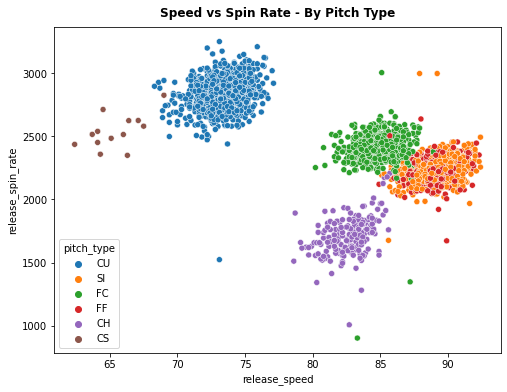

In [8]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = wain, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = ['CU', 'SI', 'FC', 'FF', 'CH', 'CS'], palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Spin Axis

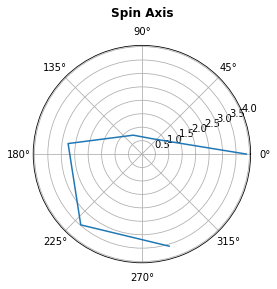

In [9]:
ax = plt.subplot(polar = True)

ax.plot([radians(x) for x in spin_axis['spin_axis'].values])
ax.set_title('Spin Axis', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

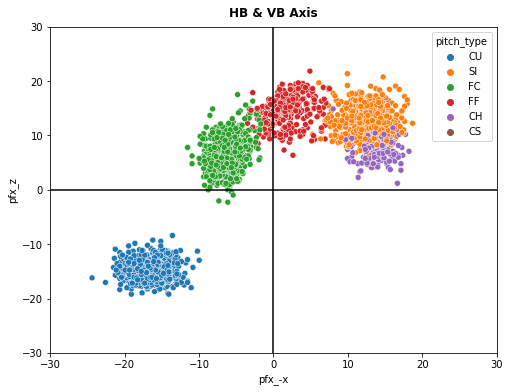

In [10]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = wain, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = ['CU', 'SI', 'FC', 'FF', 'CH', 'CS'], palette = 'tab10')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

### Release Postion

*from hitters' perspective

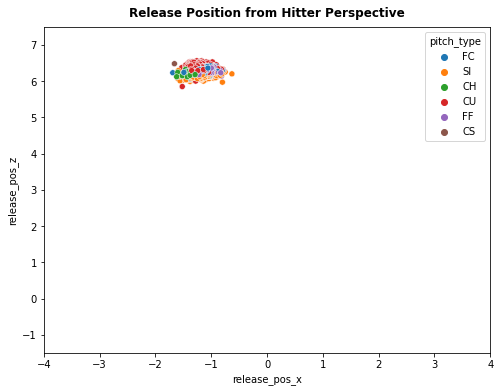

In [11]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = wain, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', palette = 'tab10')
plt.xlim(-4, 4)
plt.ylim(-1.5, 7.5)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

# Count Breakdown

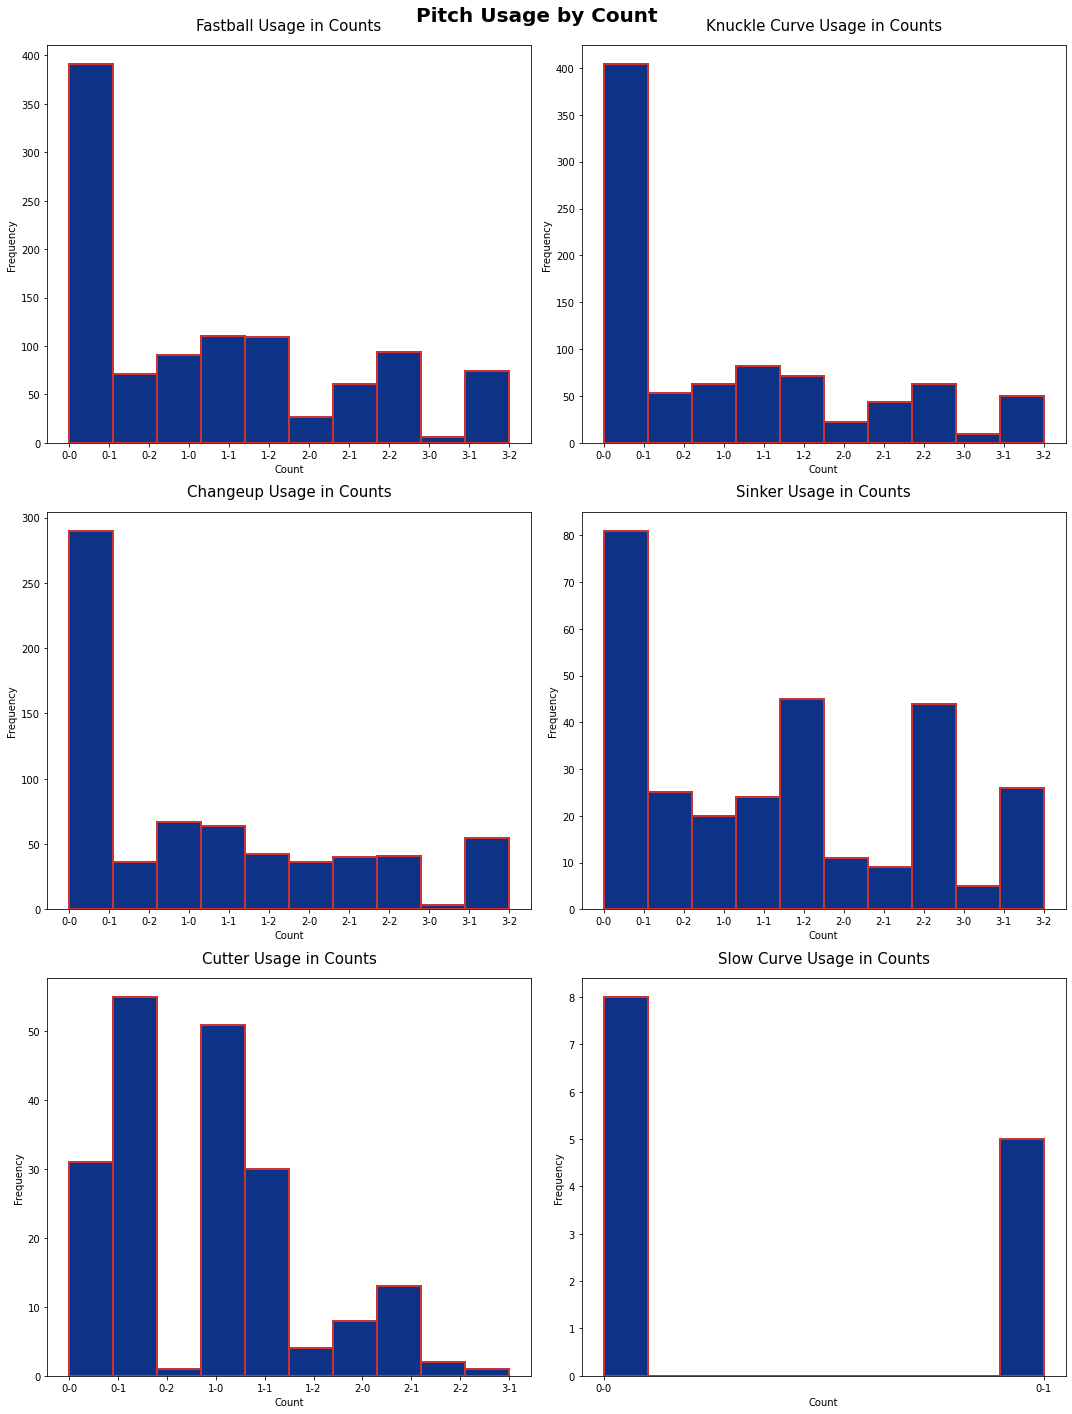

In [12]:
blue = '#0E3386'
red = '#CC3433'
fig, axs = plt.subplots(3, 2, figsize = (15, 20))
fig.suptitle('Pitch Usage by Count', fontsize = 20, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('Fastball Usage in Counts', fontsize = 15, pad = 15)
axs[0][1].hist(si['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Knuckle Curve Usage in Counts', fontsize = 15, pad = 15)
axs[1][0].hist(fc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Changeup Usage in Counts', fontsize = 15, pad = 15)
axs[1][1].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Sinker Usage in Counts', fontsize = 15, pad = 15)
axs[2][0].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][0].set_title('Cutter Usage in Counts', fontsize = 15, pad = 15)
axs[2][1].hist(cs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][1].set_title('Slow Curve Usage in Counts', fontsize = 15, pad = 15)
plt.tight_layout();

# Pitch Locations

### Balls and Strikes from Hitters' Perspective

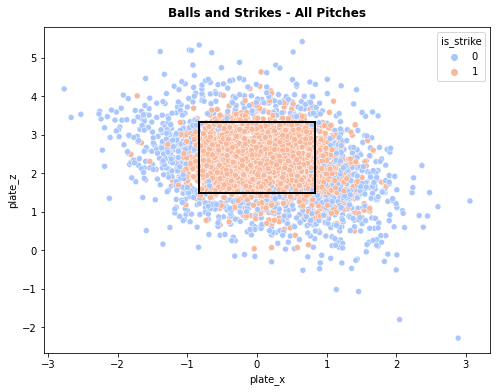

In [13]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = wain, x = 'plate_x', y = 'plate_z', hue = 'is_strike', palette = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Balls and Strikes from Hitters' Perspective

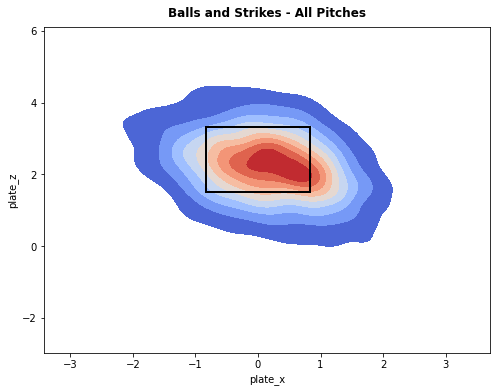

In [14]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = wain, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Curveball Heatmaps

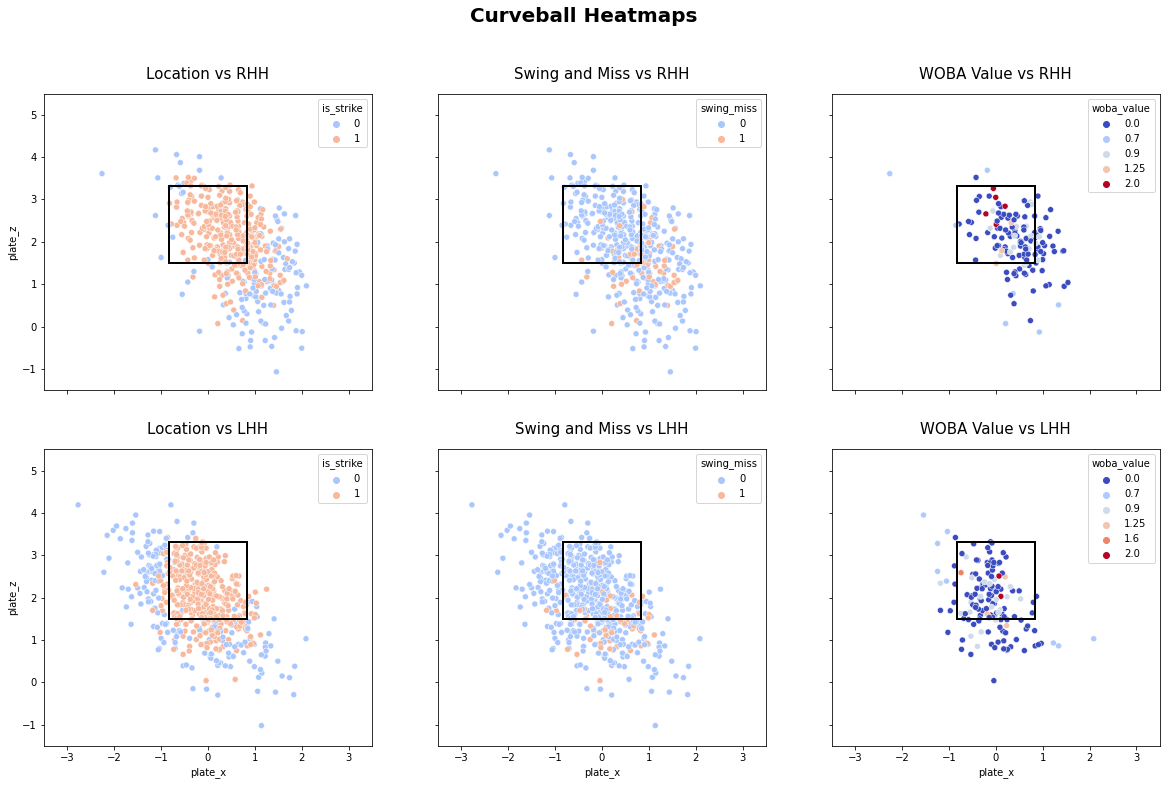

In [15]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Sinker Heatmaps

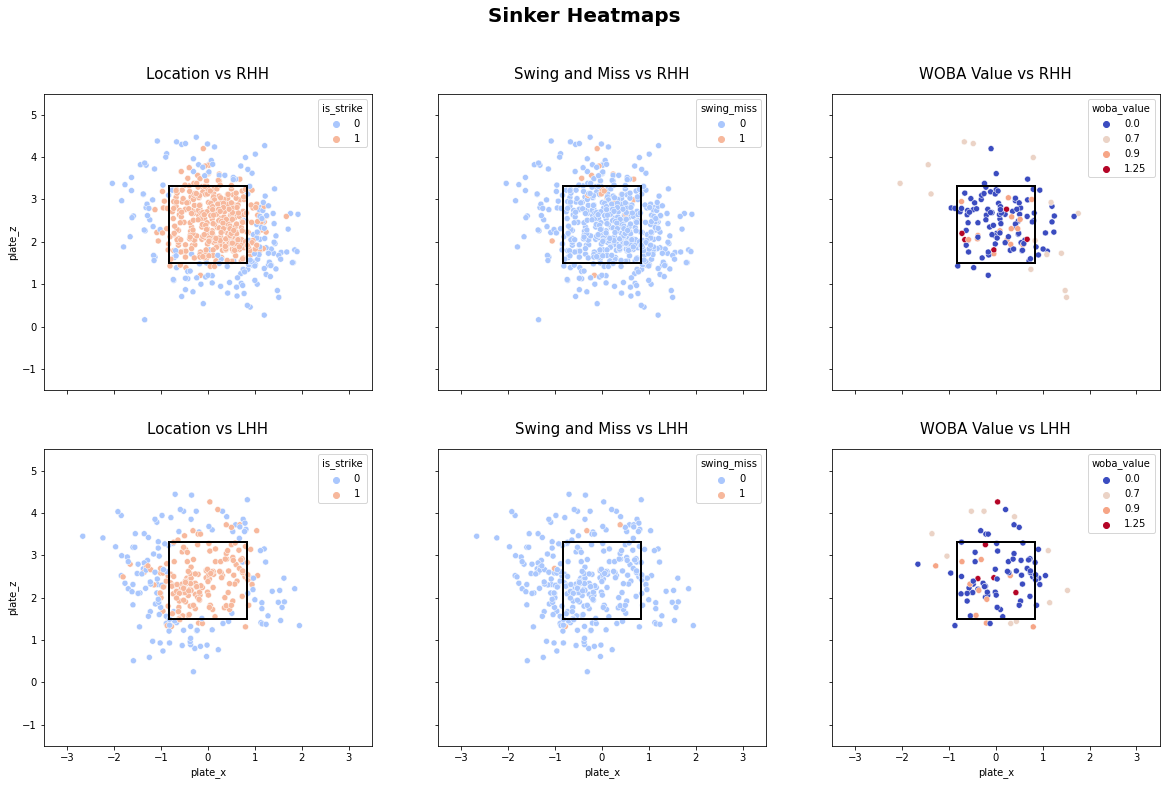

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Cutter Heatmaps

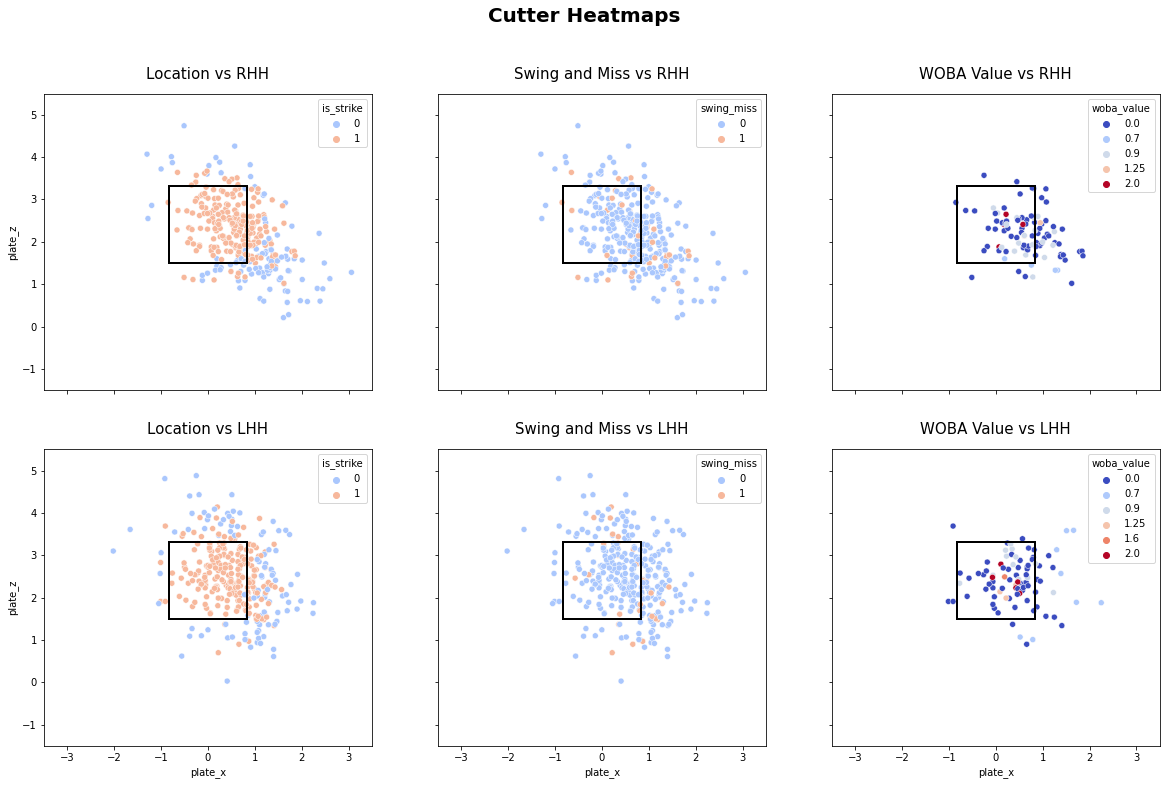

In [17]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Fastball Heatmaps

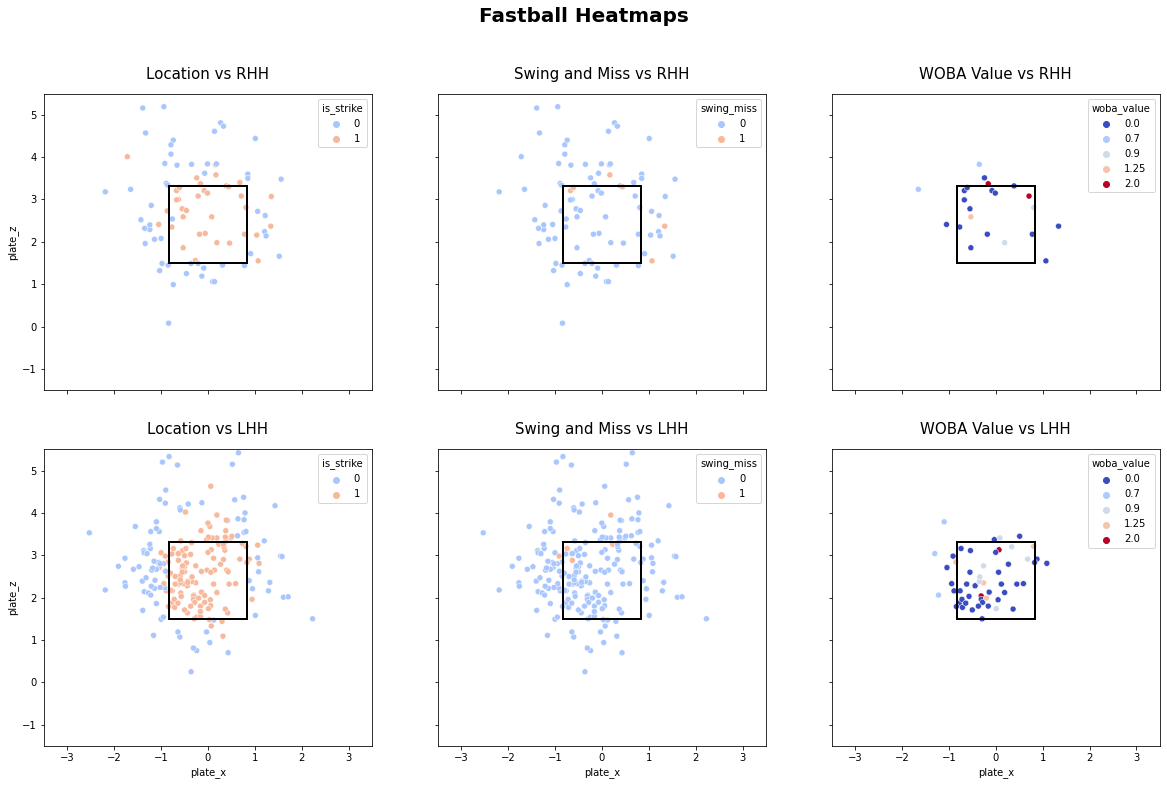

In [18]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Changeup Heatmaps

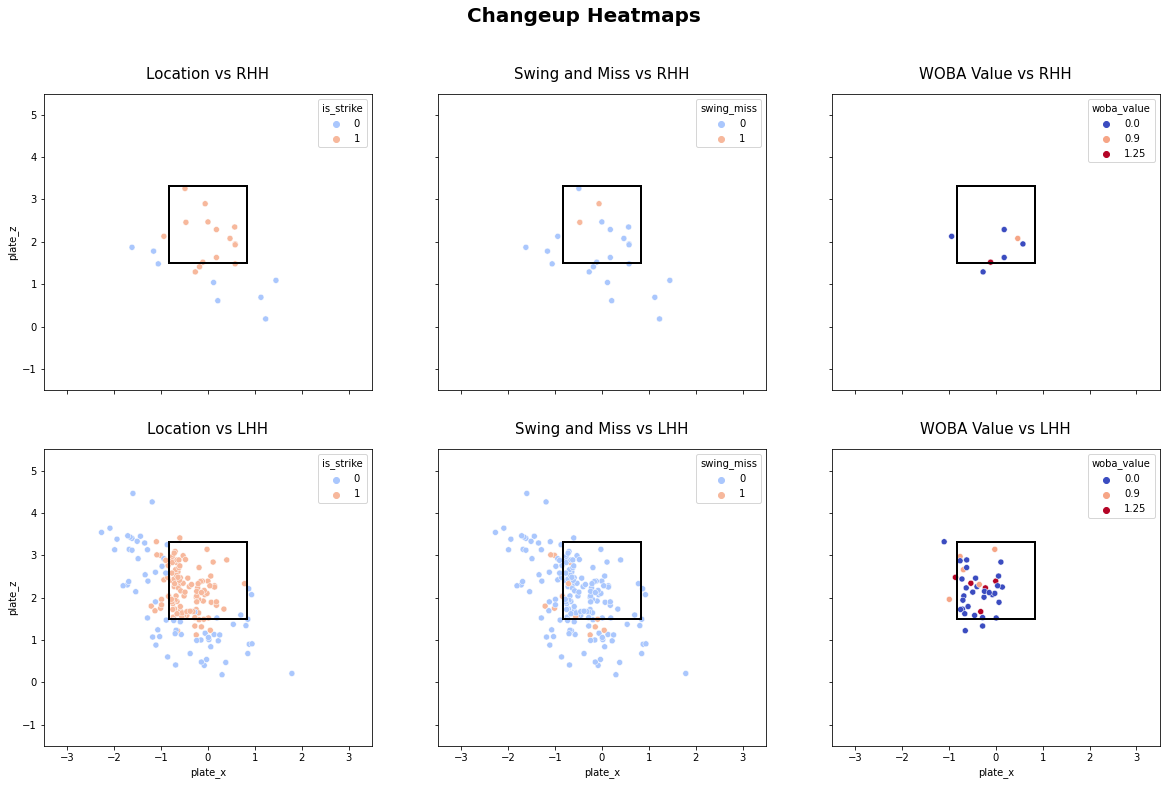

In [19]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Slow Curveball Heatmaps

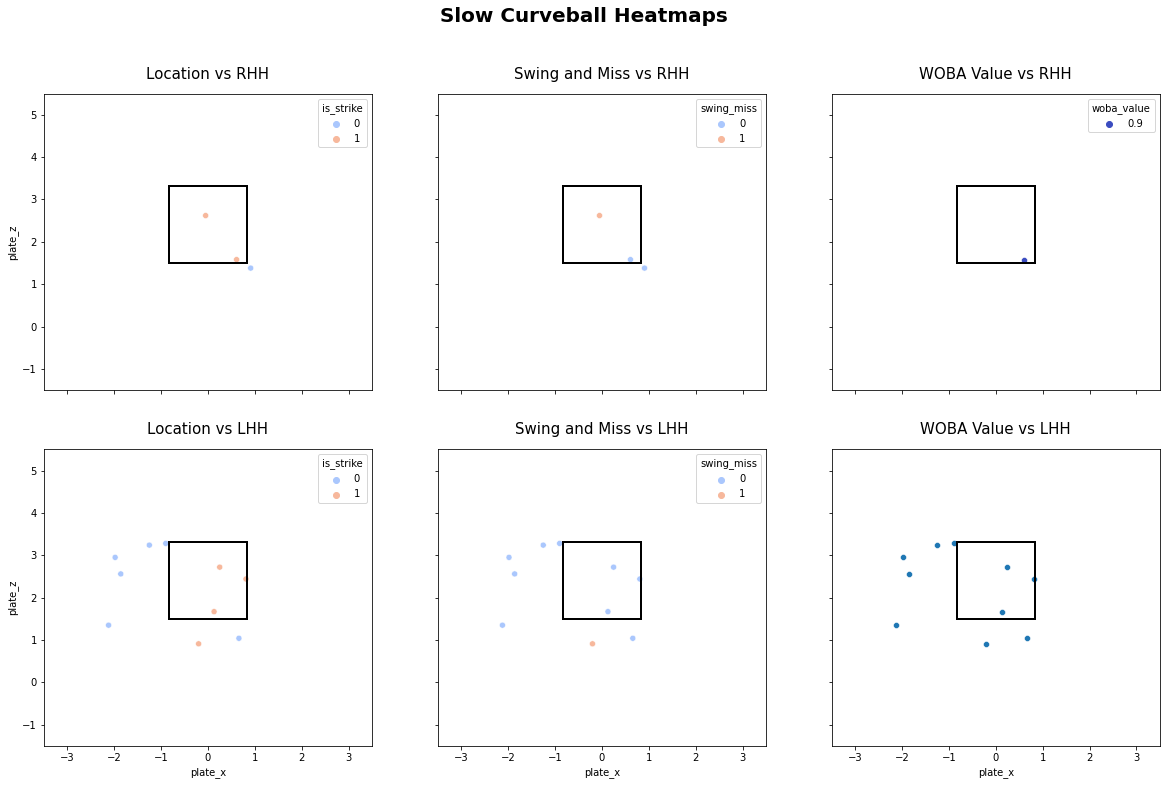

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slow Curveball Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);